<a href="https://colab.research.google.com/github/Harshita-Khudania-DS/Tableau_SDG_GOAL-8_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1- By Joan Akshita
1. Data preprocessing and visualisation (cleaning , undertstanding the data and EDA)- aggregation, wrangling,one hot encoding, scaling, feature engineering,etc, everything relevant to the data is done .

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
# Read the CSV file
df = pd.read_csv("/content/PRSA_data_2010.1.1-2014.12.31.csv")

In [ ]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB
None
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN  

In [ ]:
#DATA WRANGLING
# Drop unnecessary columns like 'No' (index) & original date parts
df.drop(columns=["No"], inplace=True)

In [ ]:
# Check for missing values
print(df.isnull().sum())

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


In [ ]:
# Handling Missing Values in PM2.5 (Time-Series Interpolation)
df["pm2.5"] = df["pm2.5"].interpolate(method='linear')

In [ ]:
# Check if missing values are filled
print(df.isnull().sum())

year      0
month     0
day       0
hour      0
pm2.5    24
DEWP      0
TEMP      0
PRES      0
cbwd      0
Iws       0
Is        0
Ir        0
dtype: int64


In [ ]:
# If still missing, fill with median
df["pm2.5"].fillna(df["pm2.5"].median(), inplace=True)

# Verify missing values
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


<ipython-input-9-5639a15389f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["pm2.5"].fillna(df["pm2.5"].median(), inplace=True)


In [ ]:
###  3. AGGREGATION ###
# Aggregate data to get daily and monthly mean PM2.5 levels
daily_df = df.groupby(["year", "month", "day"]).agg({"pm2.5": "mean", "TEMP": "mean", "PRES": "mean"}).reset_index()
monthly_df = df.groupby(["year", "month"]).agg({"pm2.5": "mean", "TEMP": "mean", "PRES": "mean"}).reset_index()

print("\nAggregated Daily Data:\n", daily_df.head())
print("\nAggregated Monthly Data:\n", monthly_df.head())


Aggregated Daily Data:
    year  month  day       pm2.5       TEMP         PRES
0  2010      1    1   73.000000  -6.750000  1017.083333
1  2010      1    2  145.958333  -5.125000  1024.750000
2  2010      1    3   78.833333  -8.541667  1022.791667
3  2010      1    4   31.333333 -11.500000  1029.291667
4  2010      1    5   42.458333 -14.458333  1033.625000

Aggregated Monthly Data:
    year  month      pm2.5       TEMP         PRES
0  2010      1  86.688172  -6.162634  1028.009409
1  2010      2  98.264137  -1.922619  1023.776786
2  2010      3  98.886425   3.293011  1021.811828
3  2010      4  79.884722  10.806944  1017.169444
4  2010      5  86.910618  20.831989  1007.896505


In [ ]:
# Feature Engineering - Creating a 'Season' Column
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["month"].apply(get_season)

In [ ]:
# Convert year, month, day, hour into a datetime format
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
df["season"] = df["datetime"].dt.month.apply(get_season)

# Extract time-based features
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month

# Drop the datetime column after extracting features
df.drop(columns=["datetime"], inplace=True)

In [ ]:
# One-Hot Encoding Categorical Features (Wind Direction & Season)
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features = encoder.fit_transform(df[['cbwd', 'season']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['cbwd', 'season']))

In [ ]:
print(df.columns)

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir', 'season', 'day_of_week'],
      dtype='object')


In [ ]:
# Drop original categorical columns and merge new features
df = df.drop(columns=['cbwd', 'season'])
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['TEMP', 'PRES', 'DEWP', 'Iws']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Splitting into Train and Test Sets
X = df.drop(columns=["pm2.5"])  # Drop target
y = df["pm2.5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Final check
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (35059, 17)
Test Set Shape: (8765, 17)


TASK 2 - By Harshita Khudania.
2. To build classification models (SVM, Logistic Regression, Random Forest, KNN) to predict PM2.5 levels, evaluated them using accuracy, precision, recall, and applied PCA to reduce dimensions. After retraining models on PCA-transformed data, analyzed the impact on performance, tuned KNN for the best k-value, and visualized results with confusion matrices, classification reports, and ROC curves. Debugging ensured correct feature alignment between models and test datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report,
    confusion_matrix
)

In [ ]:
df = pd.read_csv("/content/PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [5]:
df.shape

(43824, 13)

In [6]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [7]:
df.nunique()

,0
No,43824
year,5
month,12
day,31
hour,24
pm2.5,581
DEWP,69
TEMP,64
PRES,60
cbwd,4


In [8]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [ ]:
# Handling missing values
df = df.dropna()

In [ ]:
# Categorizing PM2.5 levels (classification)
df['pm2.5_category'] = pd.cut(df['pm2.5'], bins=[-1, 35, 75, np.inf], labels=[0, 1, 2])

<ipython-input-14-b4fb368560fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["season"], y=df["pm2.5"], estimator=np.mean, palette="Set2")


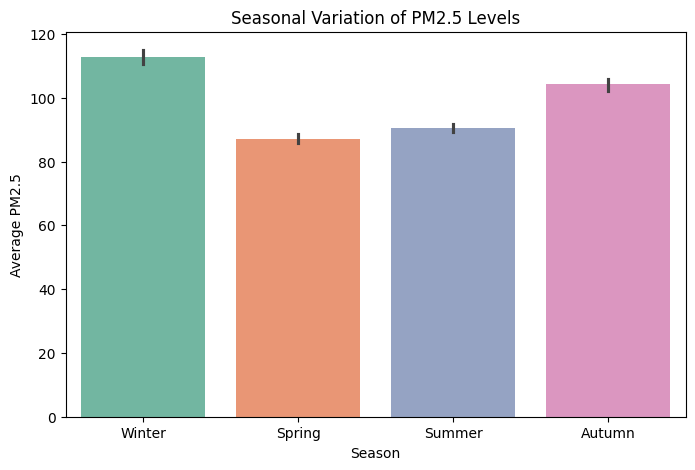

In [14]:
df["season"] = df["month"].map({12: "Winter", 1: "Winter", 2: "Winter",
                                3: "Spring", 4: "Spring", 5: "Spring",
                                6: "Summer", 7: "Summer", 8: "Summer",
                                9: "Autumn", 10: "Autumn", 11: "Autumn"})

plt.figure(figsize=(8,5))
sns.barplot(x=df["season"], y=df["pm2.5"], estimator=np.mean, palette="Set2")
plt.xlabel("Season")
plt.ylabel("Average PM2.5")
plt.title("Seasonal Variation of PM2.5 Levels")
plt.show()

In [20]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print(correlation_matrix)

             No          year         month           day          hour  \
No     1.000000  9.797958e-01  1.993007e-01  1.880803e-02  5.471695e-04   
year   0.979796  1.000000e+00  3.070661e-13  3.200526e-15 -3.318729e-15   
month  0.199301  3.070661e-13  1.000000e+00  1.079604e-02 -1.525086e-16   
day    0.018808  3.200526e-15  1.079604e-02  1.000000e+00 -5.312012e-17   
hour   0.000547 -3.318729e-15 -1.525086e-16 -5.312012e-17  1.000000e+00   
pm2.5 -0.017706 -1.469020e-02 -2.406878e-02  8.278849e-02 -2.311644e-02   
DEWP   0.047668  1.121574e-03  2.339746e-01  2.855899e-02 -2.098769e-02   
TEMP   0.078159  4.552854e-02  1.700926e-01  1.479104e-02  1.500656e-01   
PRES  -0.024224 -1.257001e-02 -6.218507e-02 -7.070048e-03 -4.192788e-02   
Iws   -0.062427 -6.424368e-02  3.043299e-03 -8.953566e-03  5.661776e-02   
Is    -0.029464 -1.700207e-02 -6.167206e-02 -3.682638e-02 -2.373592e-03   
Ir    -0.016563 -2.438290e-02  3.673715e-02  2.681328e-03 -6.286241e-03   

          pm2.5      DEW

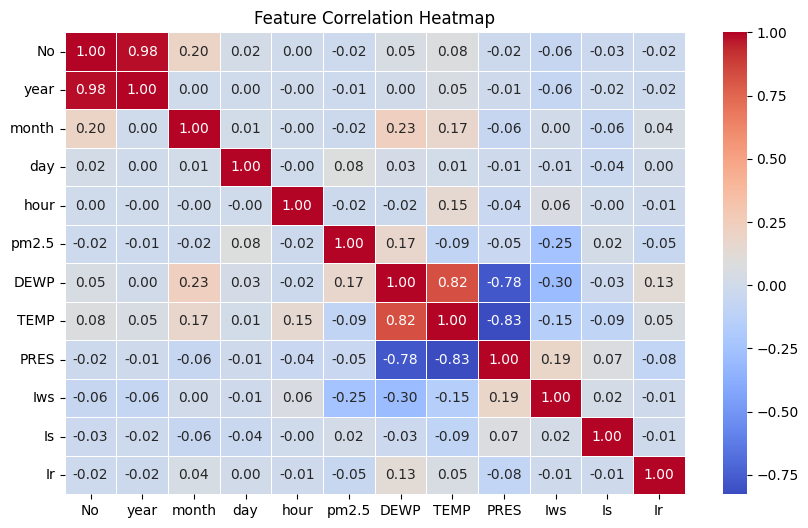

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Selecting features (removing unnecessary columns)
X = df.drop(columns=['No', 'year', 'day', 'pm2.5', 'pm2.5_category'])
y = df['pm2.5_category']
y

,pm2.5_category
24,2
25,2
26,2
27,2
28,2
...,...
43819,0
43820,0
43821,0
43822,0


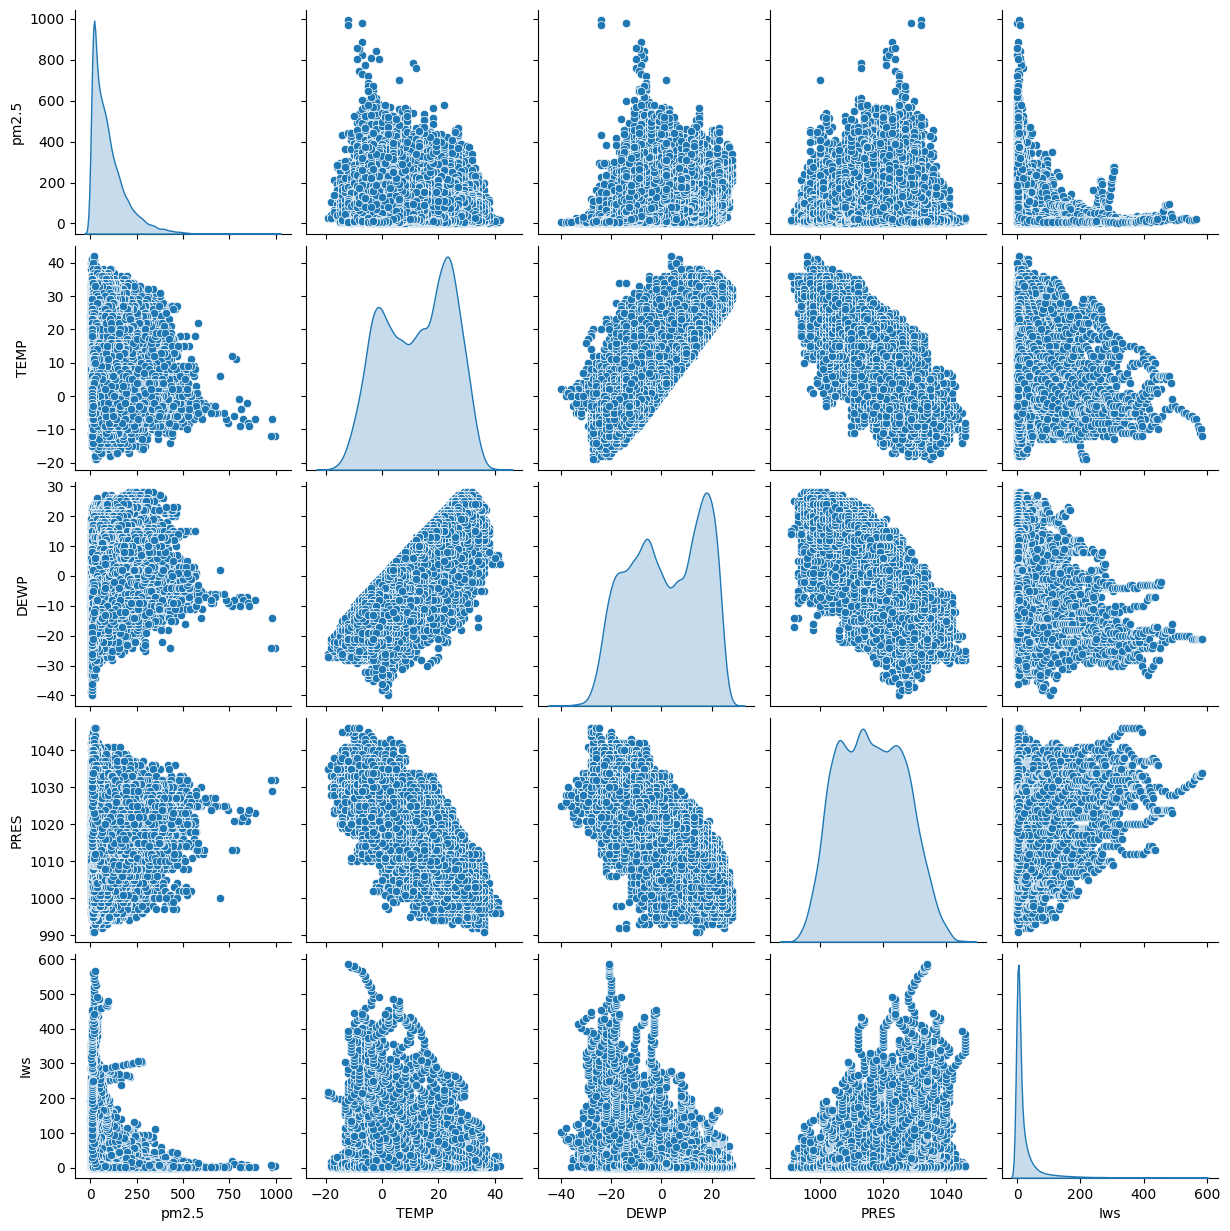

In [16]:
sns.pairplot(df[["pm2.5", "TEMP", "DEWP", "PRES", "Iws"]], diag_kind="kde")
plt.show()

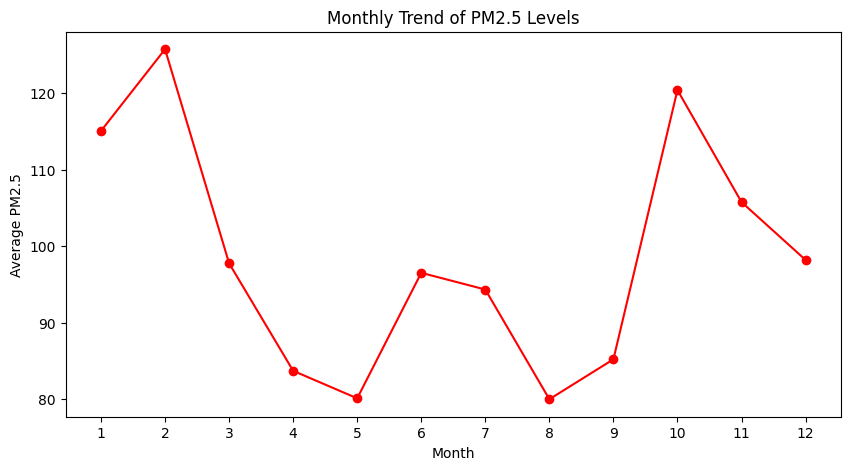

In [10]:
plt.figure(figsize=(10,5))
df.groupby("month")["pm2.5"].mean().plot(marker="o", linestyle="-", color="red")
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Monthly Trend of PM2.5 Levels")
plt.xticks(range(1,13))
plt.show()

In [ ]:
# Encoding categorical variable
X = pd.get_dummies(X, columns=['cbwd'], drop_first=True)
X

,month,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
24,1,0,-16,-4.0,1020.0,1.79,0,0,False,True,False
25,1,1,-15,-4.0,1020.0,2.68,0,0,False,True,False
26,1,2,-11,-5.0,1021.0,3.57,0,0,False,True,False
27,1,3,-7,-5.0,1022.0,5.36,1,0,False,True,False
28,1,4,-7,-5.0,1022.0,6.25,2,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
43819,12,19,-23,-2.0,1034.0,231.97,0,0,True,False,False
43820,12,20,-22,-3.0,1034.0,237.78,0,0,True,False,False
43821,12,21,-22,-3.0,1034.0,242.70,0,0,True,False,False
43822,12,22,-22,-4.0,1034.0,246.72,0,0,True,False,False


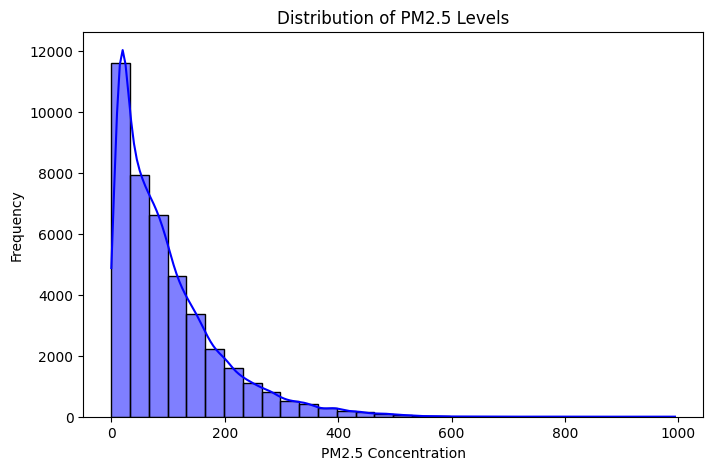

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["pm2.5"].dropna(), bins=30, kde=True, color="blue")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5 Levels")
plt.show()

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.14484032, -1.36923608,  0.98698145, ..., -0.69106751,
         1.36742289, -0.52199088],
       [-0.43422628, -1.22487237,  0.50191281, ..., -0.69106751,
        -0.73130266, -0.52199088],
       [ 0.72390693, -0.21432641,  0.29402625, ...,  1.44703662,
        -0.73130266, -0.52199088],
       ...,
       [ 1.01344023, -0.21432641,  0.22473073, ...,  1.44703662,
        -0.73130266, -0.52199088],
       [-1.30282619,  0.36312842, -0.67611102, ..., -0.69106751,
         1.36742289, -0.52199088],
       [ 1.59250684,  1.6624018 , -0.81470206, ..., -0.69106751,
        -0.73130266,  1.91574229]])

In [ ]:
# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier()  # Default k value
}

In [ ]:
# Training models and evaluating metrics
print("Model Performance Before PCA:\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Performance Before PCA:

Logistic Regression: Accuracy=0.6577, Precision=0.6142, Recall=0.6577

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71      2424
           1       0.40      0.10      0.16      1878
           2       0.66      0.89      0.76      4050

    accuracy                           0.66      8352
   macro avg       0.59      0.56      0.54      8352
weighted avg       0.61      0.66      0.61      8352

SVM: Accuracy=0.6976, Precision=0.6673, Recall=0.6976

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      2424
           1       0.51      0.12      0.20      1878
           2       0.69      0.93      0.79      4050

    accuracy                           0.70      8352
   macro avg       0.65      0.60      0.58      8352
weighted avg       0.67      0.70      0.65      8352

Random Forest: Accuracy=0.7551, P

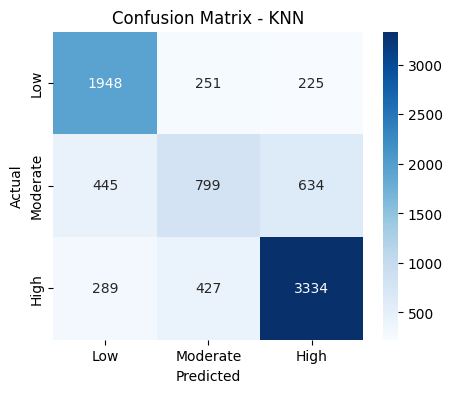

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Moderate", "High"], yticklabels=["Low", "Moderate", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {name}')
plt.show()

In [ ]:
# Finding the best k-value for KNN using cross-validation
k_values = list(range(1, 21))
knn_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    knn_scores.append(accuracy_score(y_test, y_pred))

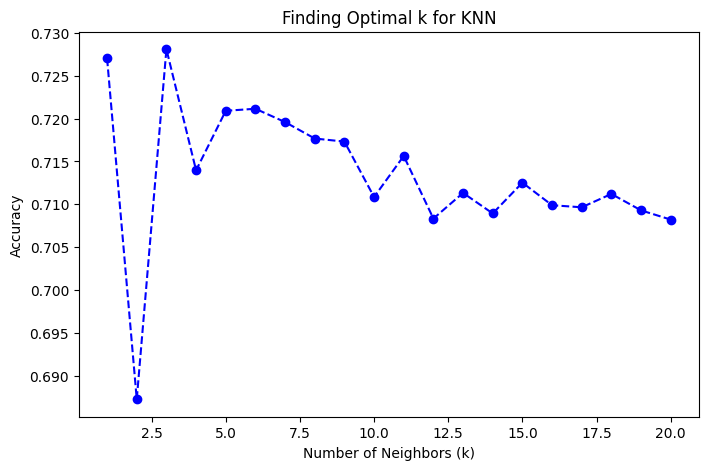

Best k-value for KNN: 3


In [ ]:
# Plotting k-values vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Finding Optimal k for KNN")
plt.show()

best_k = k_values[np.argmax(knn_scores)]
print(f"Best k-value for KNN: {best_k}")

In [ ]:
# Retraining KNN with best k
models["KNN"] = KNeighborsClassifier(n_neighbors=best_k)
models["KNN"]

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=5)  # Keeping 5 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_test_pca

array([[ 1.99479745, -0.77706637,  0.33248258,  0.70556583, -1.09132009],
       [ 0.86122984,  0.5691142 ,  0.31834262,  0.9746783 , -1.12703565],
       [ 0.17724983,  0.00720149,  1.64182335,  0.03028731, -0.3956051 ],
       ...,
       [-0.62365595,  0.00349314,  1.50716775, -0.22351607, -0.13556023],
       [-0.56218826, -1.04784366, -1.94541602,  0.19288826, -0.23468626],
       [-0.53052817,  1.70535313, -0.68288109, -1.94729849,  1.75619295]])

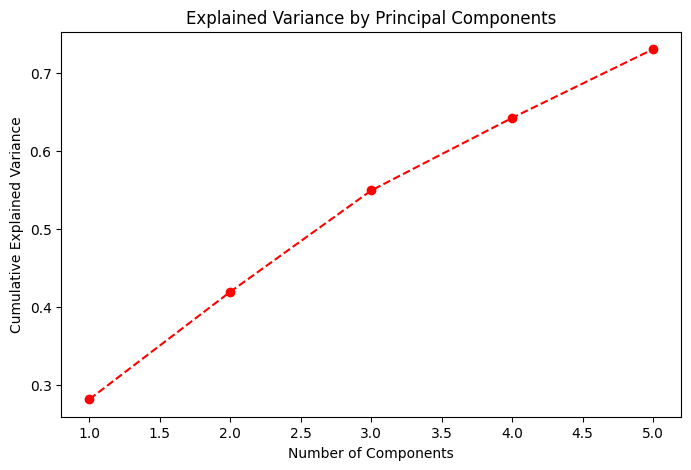


Model Performance After PCA:

Logistic Regression: Accuracy=0.5803, Precision=0.5191, Recall=0.5803

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.57      0.58      2424
           1       0.30      0.00      0.00      1878
           2       0.58      0.86      0.69      4050

    accuracy                           0.58      8352
   macro avg       0.49      0.47      0.42      8352
weighted avg       0.52      0.58      0.50      8352

SVM: Accuracy=0.6318, Precision=0.6065, Recall=0.6318

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.60      0.66      2424
           1       0.46      0.01      0.02      1878
           2       0.60      0.94      0.73      4050

    accuracy                           0.63      8352
   macro avg       0.60      0.52      0.47      8352
weighted avg       0.61      0.63      0.55      8352

Random Forest: Accuracy=0.6584, P

In [ ]:
# Plot PCA explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='r')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()

print("\nModel Performance After PCA:\n")
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)

    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
    recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

    print(f"{name}: Accuracy={accuracy_pca:.4f}, Precision={precision_pca:.4f}, Recall={recall_pca:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))

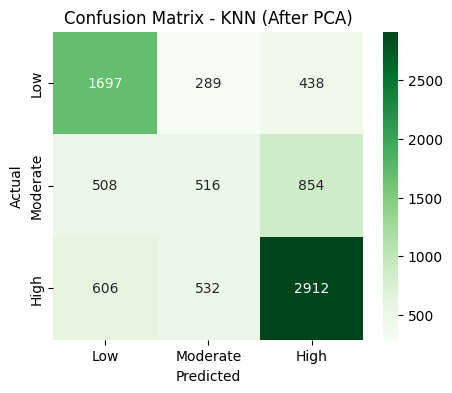

In [ ]:
# Confusion Matrix after PCA
cm_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(5,4))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens', xticklabels=["Low", "Moderate", "High"], yticklabels=["Low", "Moderate", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {name} (After PCA)')
plt.show()

In [ ]:
# Feature importance for Random Forest
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_names

Index(['month', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv'],
      dtype='object')

In [ ]:
# Ensure feature importance is computed BEFORE PCA
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
feature_names = X.columns  # Get original feature names

# Debug: Check shapes
print(f"Feature importances shape: {len(feature_importances)}")
print(f"Feature names shape: {len(feature_names)}")

# Ensure both arrays have the same length
if len(feature_importances) == len(feature_names):
    # Convert to DataFrame
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    # Sort features by importance
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance - Random Forest")
    plt.show()
else:
    print("Error: Feature importance and feature names have mismatched lengths!")

Feature importances shape: 5
Feature names shape: 11
Error: Feature importance and feature names have mismatched lengths!


<ipython-input-44-059c64909dd5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['month'], y=df['pm2.5'], palette="coolwarm")


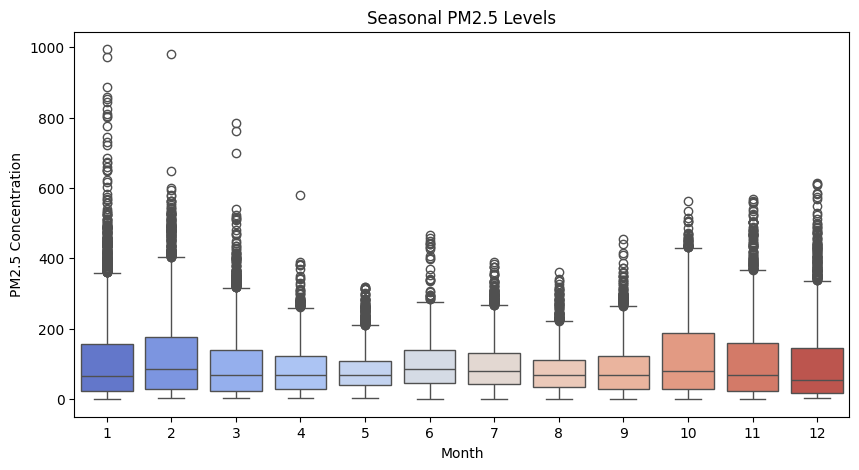

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['month'], y=df['pm2.5'], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("PM2.5 Concentration")
plt.title("Seasonal PM2.5 Levels")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters for Random Forest:", grid_search.best_params_)

# Use the best model
best_rf = grid_search.best_estimator_

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Train models again on PCA-transformed data
models_after_pca = {}

for name, model in models.items():
    model_pca = model.__class__()  # Create a new instance of the same model
    model_pca.fit(X_train_pca, y_train)  # Train on PCA-reduced features
    models_after_pca[name + " (PCA)"] = model_pca  # Store with new name

# Add PCA models to main dictionary
models.update(models_after_pca)

print(models.keys())  # Should now include PCA models

dict_keys(['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Logistic Regression (PCA)', 'SVM (PCA)', 'Random Forest (PCA)', 'KNN (PCA)'])


In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)  # Should have 11 features
print("X_train_pca shape:", X_train_pca.shape)  # Should have reduced features (e.g., 5)

# Check if models are correctly trained
for name, model in models.items():
    print(f"{name} expects {model.n_features_in_} features")

X_train_scaled shape: (33405, 11)
X_train_pca shape: (33405, 5)
Logistic Regression expects 5 features
SVM expects 5 features
Random Forest expects 5 features
KNN expects 5 features
Logistic Regression (PCA) expects 5 features
SVM (PCA) expects 5 features
Random Forest (PCA) expects 5 features
KNN (PCA) expects 5 features


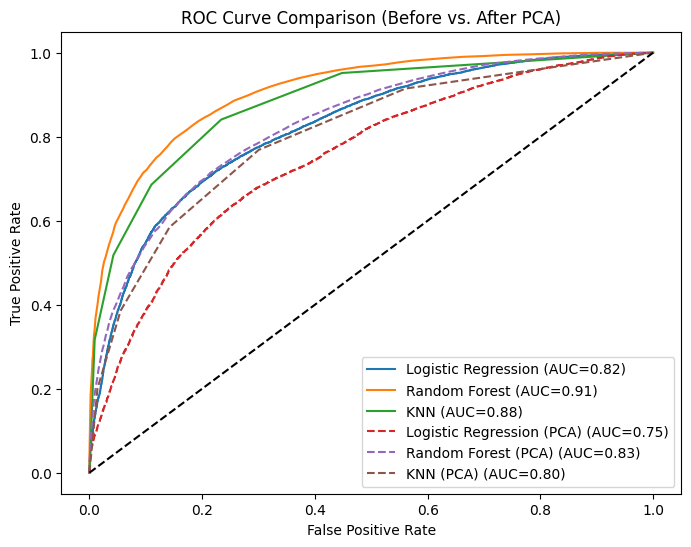

In [ ]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        # Use PCA-transformed test data for PCA models
        if "PCA" in name:
            y_score = model.predict_proba(X_test_pca)
        else:
            # Create a new instance and fit on original data if not a PCA model
            model_original = model.__class__()
            model_original.fit(X_train_scaled, y_train)
            y_score = model_original.predict_proba(X_test_scaled)

        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)

        linestyle = "dashed" if "PCA" in name else "solid"
        plt.plot(fpr, tpr, linestyle=linestyle, label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Before vs. After PCA)")
plt.legend()
plt.show()